In [3]:
!pip install pandas scikit-learn streamlit matplotlib seaborn

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [7]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1


In [8]:
# Replace 'male' with 1 and 'female' with 0
diabetes_df['gender'] = diabetes_df['gender'].replace({'Male': 1, 'Female': 0})
diabetes_df.head(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
5,0,20.0,0,0,never,27.32,6.6,85,0
6,0,44.0,0,0,never,19.31,6.5,200,1


In [9]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0


In [10]:
kidney_df = pd.read_csv('kidney.csv')
kidney_df.head(7)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd


In [11]:
def preprocess_data(df, label):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    X = df.drop(columns=[label])
    y = df[label]
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

In [51]:
d_models = {}
d_means = {}
for disease, df, label in zip(
    ["Diabetes", "Heart", "Kidney"],
    [diabetes_df, heart_df, kidney_df],
    ["diabetes", "condition", "classification"]
):
    X_train, X_test, y_train, y_test = preprocess_data(df, label)
    model = train_model(X_train, y_train)
    print(f"\n{disease} Model Report:\n", classification_report(y_test, model.predict(X_test)))
    d_models[disease] = (model, X_train.columns.tolist())
    d_means[disease] = X_train.mean() 


Diabetes Model Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Heart Model Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60


Kidney Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weig

In [44]:
patient_df = pd.read_csv("all disease patient.csv")  # replace with your file
display(patient_df.head())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,sex,cp,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
1,50,0,0,1,27.5,6.2,120,1,3,130,...,40,6000,5,0,0,0,1,1,0,0


In [52]:
def predict_all(patient_df, d_models, d_means):
    predictions = {}
    risk_score = 0
    
    for disease, (model, features) in d_models.items():
        missing = set(features) - set(patient_df.columns)
        if missing:
            print(f"[SKIPPED] {disease.upper()} - Missing features: {missing}")
            # Impute missing columns with mean from training data
            for col in missing:
                patient_df[col] = d_means[disease][col]
        # Reorder columns as expected by the model
        input_df = patient_df[list(features)]
        
        # Get prediction probability for positive class
        proba = model.predict_proba(input_df)[:, 1]  
        predictions[disease] = proba
        
        # You can define threshold e.g. 0.5 to count as risk for risk_score
        risk_score += sum(proba > 0.5)
    
    return predictions, risk_score

In [54]:
predictions, risk_score = predict_all(patient_df, d_models,d_means)

for disease, preds in predictions.items():
    print(f"{disease.upper()} predictions: {preds}")

print(f"\n🧠 RISK SCORE: {risk_score}")


DIABETES predictions: [0.82]
HEART predictions: [0.88]
KIDNEY predictions: [0.11]

🧠 RISK SCORE: 2


In [55]:
def risk_score_level(score):
    if score == 0:
        return "🟢 Low Risk"
    elif score == 1:
        return "🟡 Medium Risk"
    else:
        return "🔴 High Risk"
level = risk_score_level(risk_score)
print(f"✅ Risk Level: {level}")

✅ Risk Level: 🔴 High Risk


In [48]:
%matplotlib inline

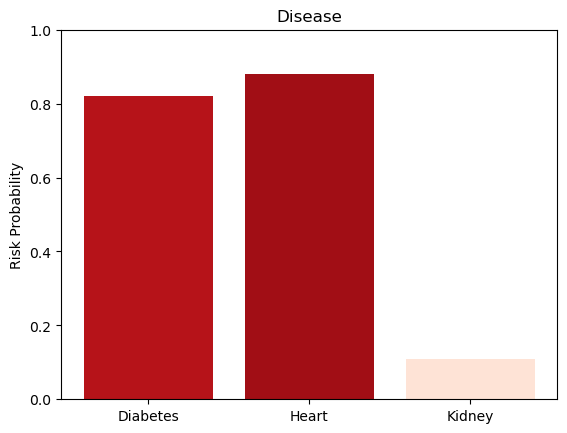

In [57]:
import matplotlib.pyplot as plt
import numpy as np

diseases = list(predictions.keys())
probs = [predictions[d][0] for d in diseases]  # take first patient if multiple rows

colors = plt.cm.Reds(probs)  # Reds colormap from 0 (light) to 1 (dark)

plt.bar(diseases, probs, color=colors)
plt.ylim(0, 1)
plt.ylabel("Risk Probability")
plt.title("Disease")
plt.show()

In [58]:
def patient_report(patient_df, predictions, score):
    report = patient_df.copy()
    for disease, pred in predictions:
        report[disease + "_Prediction"] = pred[0]
    report["Risk_Score"] = score
    return report

report = patient_report(patient_df, results, score)
display(report)
report.to_csv("patient_report.csv", index=False)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,sex,cp,...,htn,dm,cad,appet,pe,ane,Diabetes_Prediction,Heart_Prediction,Kidney_Prediction,Risk_Score
1,50,0,0,1,27.5,6.2,120,1,3,130,...,0,0,1,1,0,0,1,1,0,2
